### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [2]:
import pandas as pd
df = pd.read_csv('../dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월일     20 non-null     object
 1   당일종가    20 non-null     int64 
 2   전일종가    20 non-null     int64 
 3   시가      20 non-null     int64 
 4   고가      20 non-null     int64 
 5   저가      20 non-null     int64 
 6   거래량     20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [4]:
df.drop('전일종가',axis=1,inplace=True)
df.columns=['Date', 'Close', 'Start', 'High', 'Low', 'Volume']
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [5]:
df.to_pickle('../dataset/sprice.pkl')
df = pd.read_pickle('../dataset/sprice.pkl')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df = pd.read_pickle('../dataset/sprice.pkl')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
# Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
# 컬럼 선택 : 'Close' 'Start' 'High' 'Low'
import pandas as pd
df['Ndate']=pd.to_datetime(df['Date'])
df.set_index('Ndate', inplace=True)
df1 = df[['Close','Start','High','Low']]
df1.head()

,Close,Start,High,Low
Ndate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


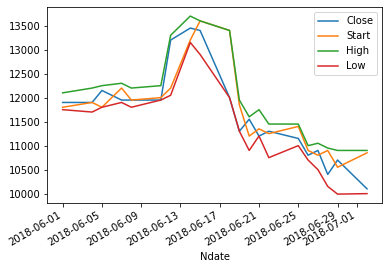

In [9]:
# 선그래프
df1.plot()

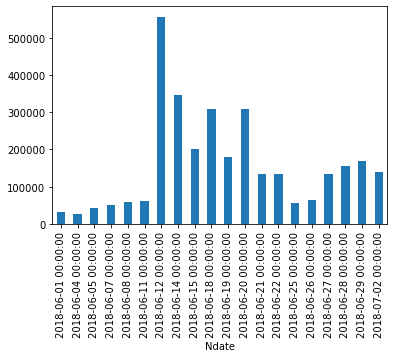

In [13]:
# 막대 그래프 : 일별 거래량
df.Volume[::-1].plot(kind='bar')

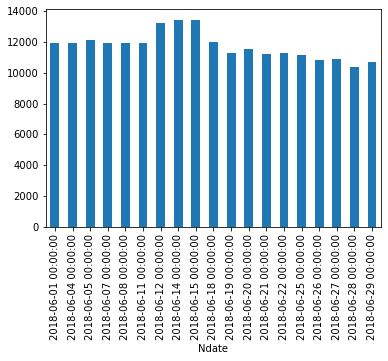

In [15]:
# 6월말 추출하여 Close 칼럼으로 일별 막대 그래프 표현
df1.loc['2018-6','Close'][::-1].plot(kind='bar')

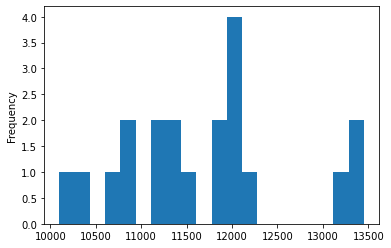

In [18]:
# 히스토그램 : 변수의 도수분포
df1.Close.plot(kind='hist',bins=20)

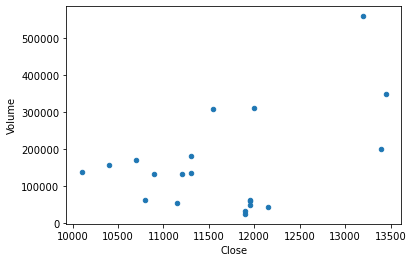

In [19]:
df.plot(x='Close',y='Volume',kind='scatter')

In [20]:
# 상관계수
df.corr()

,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


In [22]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

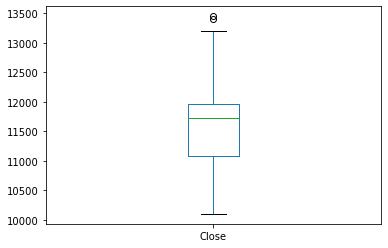

In [21]:
# box plot
df.Close.plot(kind='box')

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값 

In [27]:
# 이상치
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close'] <= (Q1-IQR*1.5)) | (df['Close'] >= (Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume
Ndate,,,,,,
2018-06-15,2018-06-15,13400,13600,13600,12900,201376
2018-06-14,2018-06-14,13450,13200,13700,13150,347451


In [28]:
# upper whisker 산출 기준 : Q3 + 1.5 x IQR 이내인 값중에서 최댓값
Q3+IQR*1.5

13275.0

In [42]:
# upper whisker = 13200
# 이상치 : u whisker를 벗어나는 값
df.sort_values('Close',ascending=False)[['Close']].head()

,Close
Ndate,
2018-06-14,13450
2018-06-15,13400
2018-06-12,13200
2018-06-05,12150
2018-06-18,12000


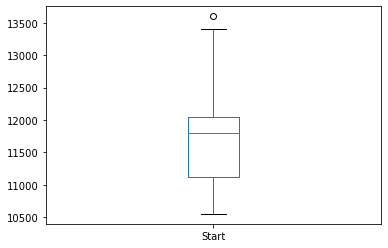

In [6]:
# Q. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
df.Start.plot(kind='box')

In [7]:
df.sort_values('Start',ascending=False)[['Close']].head()

,Close
Ndate,
2018-06-15,13400
2018-06-18,12000
2018-06-14,13450
2018-06-07,11950
2018-06-12,13200


In [9]:
# 이상치
Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Start'] <= (Q1-IQR*1.5)) | (df['Start'] >= (Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume
Ndate,,,,,,
2018-06-15,2018-06-15,13400,13600,13600,12900,201376


In [10]:
# upper whisker 산출 기준 : Q3 + 1.5 x IQR 이내인 값중에서 최댓값
Q3+IQR*1.5

13437.5

#### 과제. High, Low 컬럼에 대하여 이상치 여부를 시각화로 확인 후 그 값을 제거하세요.

In [11]:
# 남북한의 연도별 발전량 데이터 셋
# Q. 남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술하세요.
df_ep = pd.read_excel('../dataset/df_ep.xlsx')
df_ep.head()

,year,south,notth
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


In [ ]:
# 엑셀 파일 불러오기 에러나는 경우 시도해 볼 수 있는 방법
!pip install openpyxl
!pip install xlrd
pd.read_excel('../dataset/df_ep.xlsx',encoding = 'cp949')

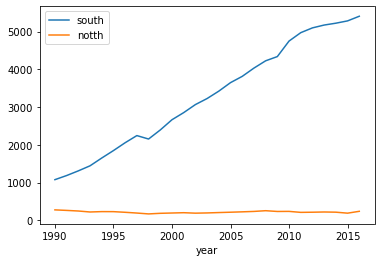

In [12]:
df_ep.set_index('year',inplace=True)
df_ep.plot()

#### 과제. df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요.(5개 이상)

In [13]:
df_auto = pd.read_excel('../dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### 과제. mpg 컬럼의 이상치 여부를 판단하시고 의심되는 값이 있는 경우 제거하세요.